In [43]:
%matplotlib inline

import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import manifold, cluster, neighbors
import networkx as nx
import time
import community as cm

In [44]:
# all_embeds = pickle.load(open('hepth/cora_embeds.pkl', 'rb'))
# all_embeds = pickle.load(open('hepth/AS_node2vec.pkl', 'rb'))
# all_embeds = pickle.load(open('hepth/AS_embeds.pkl', 'rb'))
all_embeds = pickle.load(open('vis/151.pkl', 'rb'))[1][2:]

init_shape = all_embeds[0].shape[0]

nets = [nx.read_graphml('runs/graphs/m' + str(i)  + '.graphml') for i in [1428, 1429]]

0


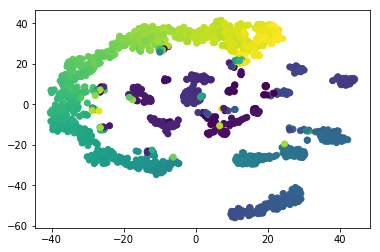

------------------
1


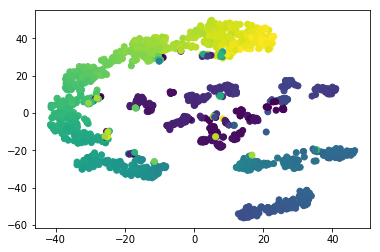

------------------


In [45]:
tsnes = []
init = 'random'

for i, emb in enumerate(all_embeds):
    tsne = manifold.TSNE(n_components=2, random_state=0, init=init)

    emb = emb[:init_shape, :]
    
    init = tsne.fit_transform(emb)

    tsnes.append(init)
    
    network = nets[i]
    
    attrs = [nx.get_node_attributes(network, 'apt_markakis')[j] for j in network.nodes][:init_shape]
    
    plt.scatter(init[:,0], init[:,1], c=attrs)
    print(i)
    plt.show()
    print('------------------')

In [46]:
def get_closest(node, embeddings):
    tree = neighbors.KDTree(embeddings)
    _, ind =  tree.query(node, k=11)
    return ind[0]

In [47]:
# s1 = 1485

# s2 = get_closest(all_embeds[0][1485].reshape(1, -1), all_embeds[0])
# s3 = get_closest(all_embeds[1][1485].reshape(1, -1), all_embeds[1])

# samples = list(set(s2).union(set(s3)))

# print(samples)

# # # 588, 1485

# x1 = []
# x2 = []
# y1 = []
# y2 = []

# for i in range(len(tsnes) - 1):
#     one = tsnes[i]
#     two = tsnes[i + 1]

#     deltas = two - one
#     true_deltas = all_embeds[i+1] - all_embeds[i]
    
#     print(str(1285 + i), np.average(np.linalg.norm(true_deltas, ord=2, axis=1)))

#     plt.scatter(one[samples, 0], one[samples, 1])
#     plt.scatter(two[samples, 0], two[samples, 1])

#     # print(one[samples, 0].shape)
#     # print(one[samples, 1].shape)
#     # print(deltas[samples, 0].shape)
#     # print(deltas[samples, 1].shape)

#     plt.quiver(one[samples, 0], one[samples, 1], deltas[samples, 0], deltas[samples, 1], 
#                units = 'xy', scale_units='xy', angles='xy', scale=1)

#     x1.append(plt.xlim()[0])
#     x2.append(plt.xlim()[1])
    
#     y1.append(plt.ylim()[0])
#     y2.append(plt.ylim()[1])
    
#     plt.cla()
#     plt.clf()

# xlim = [min(x1), max(x2)]
# ylim = [min(y1), max(y2)]

# for i in range(len(tsnes) - 1):
#     one = tsnes[i]
#     two = tsnes[i + 1]

#     deltas = two - one
#     true_deltas = all_embeds[i+1] - all_embeds[i]
    
#     fig, ax = plt.subplots()
    
#     ax.set_title("l2 norm of diff: " + str(np.average(np.linalg.norm(true_deltas, ord=2, axis=1))))
    
#     plt.setp(ax, xlim=xlim, ylim=ylim)

#     ax.scatter(one[samples, 0], one[samples, 1])
    
#     plt.savefig('images/deltas/' + str(i) + '1.png')
    
#     ax.quiver(one[samples, 0], one[samples, 1], deltas[samples, 0], deltas[samples, 1], 
#                units = 'xy', scale_units='xy', angles='xy', scale=1, label=['a', 'b', 'c', 'd', 'e'])
    
#     plt.savefig('images/deltas/' + str(i) + '2.png')
    
#     ax.scatter(two[samples, 0], two[samples, 1])
    
#     plt.savefig('images/deltas/' + str(i) + '3.png')
    
# #     plt.show()
#     plt.cla()
#     plt.clf()
#     plt.close('all')

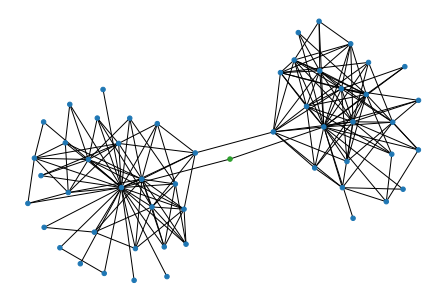

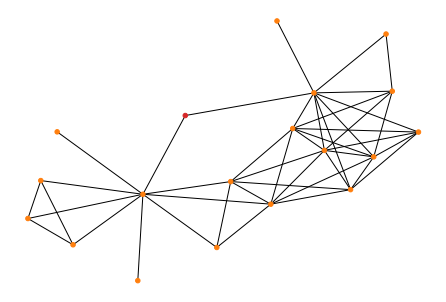

<Figure size 432x288 with 0 Axes>

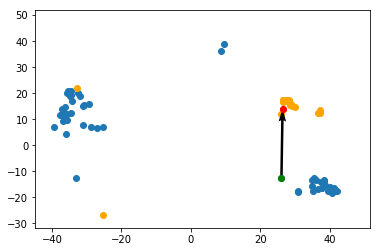

In [64]:

s1 = 1424

# n1 = list(nets[0][str(s1)])
# n1 = [int(x) for x in n1]
n1 = nx.ego_graph(nets[0], str(s1), 2)
nx.draw_kamada_kawai(n1, node_size=20, node_color = ['C0' if i != str(s1) else 'C2' for i in n1.nodes])
plt.show()
n1 = [int(x) for x in n1.nodes]

# n2 = list(nets[1][str(s1)])
# n2 = [int(x) for x in n2]
# n2 = [x for x in n2 if str(x) in nets[0].nodes]

n2 = nx.ego_graph(nets[1], str(s1), 2)
nx.draw_kamada_kawai(n2, node_size=20, node_color = ['C1' if i != str(s1) else 'C3' for i in n2.nodes])
plt.show()
n2 = [int(x) for x in n2.nodes]
n2 = [x for x in n2 if str(x) in nets[0].nodes]

all_neighbors = set(n1).union(set(n2)).union(set([s1]))
all_neighbors = list(all_neighbors)

# # 588, 1485

x1 = []
x2 = []
y1 = []
y2 = []

for i in range(len(tsnes) - 1):
    one = tsnes[i]
    two = tsnes[i + 1]

    deltas = two - one
    true_deltas = all_embeds[i+1][:init_shape, :] - all_embeds[i]
    
    plt.scatter(one[all_neighbors, 0], one[all_neighbors, 1])
    plt.scatter(two[all_neighbors, 0], two[all_neighbors, 1])

    # print(one[samples, 0].shape)
    # print(one[samples, 1].shape)
    # print(deltas[samples, 0].shape)
    # print(deltas[samples, 1].shape)

    plt.quiver(one[all_neighbors, 0], one[all_neighbors, 1], deltas[all_neighbors, 0], deltas[all_neighbors, 1], 
               units = 'xy', scale_units='xy', angles='xy', scale=1)

    x1.append(plt.xlim()[0])
    x2.append(plt.xlim()[1])
    
    y1.append(plt.ylim()[0])
    y2.append(plt.ylim()[1])
        
    plt.cla()
    plt.clf()
    
xlim = [min(x1), max(x2)]
ylim = [min(y1), max(y2)]

for i in range(len(tsnes) - 1):
    one = tsnes[i]
    two = tsnes[i + 1]
    
    averages = one + two
    averages /= 2
    

    deltas = two - one
#     true_deltas = all_embeds[i+1][:init_shape, :] - all_embeds[i]
    
    fig, ax = plt.subplots()
    
    
    plt.setp(ax, xlim=xlim, ylim=ylim)
    
    
    ax.scatter(one[n1, 0], one[n1, 1])
    ax.scatter(two[n2, 0], two[n2, 1], c='orange')
    
    ax.quiver(one[s1, 0], one[s1, 1], deltas[s1, 0], deltas[s1, 1], 
               units = 'xy', scale_units='xy', angles='xy', scale=1)
    
    ax.scatter(one[s1, 0], one[s1, 1], c='g')
    ax.scatter(two[s1, 0], two[s1, 1], c='red')
    
#     plt.savefig('images/deltas/' + str(i) + '3.png')

#     plt.title('TSNE Visualization of a Schelling Step')
    
    plt.show()
    plt.cla()
    plt.clf()
    plt.close('all')